In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.dpi']= 100
matplotlib.rcParams['figure.figsize'] = 20, 10
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline

In [2]:
data = pd.read_csv('bavl_data.csv')

In [3]:
data

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,BAVL,D,25.03.2009,10:00:00,0.0500,0.0500,0.0500,0.0500,40000
1,BAVL,D,26.03.2009,10:00:00,0.0804,0.0816,0.0790,0.0810,3870000
2,BAVL,D,27.03.2009,10:00:00,0.0805,0.0805,0.0790,0.0790,1070000
3,BAVL,D,30.03.2009,10:00:00,0.0785,0.0785,0.0785,0.0785,650000
4,BAVL,D,01.04.2009,10:00:00,0.0800,0.0810,0.0800,0.0810,790000
5,BAVL,D,02.04.2009,10:00:00,0.0825,0.0865,0.0810,0.0865,1570000
6,BAVL,D,03.04.2009,10:00:00,0.0900,0.1130,0.0900,0.1030,5140000
7,BAVL,D,06.04.2009,10:00:00,0.1055,0.1280,0.1055,0.1250,3790000
8,BAVL,D,07.04.2009,10:00:00,0.1230,0.1230,0.1197,0.1199,1240000
9,BAVL,D,08.04.2009,10:00:00,0.1100,0.1185,0.1090,0.1180,3150000


In [4]:
ts_data = data

In [5]:
ts_data['<DATE>'] = [pd.to_datetime(date, format='%dd%mm%yy', errors='ignore') for date in ts_data['<DATE>']]

In [6]:
[pd.to_datetime(date, format='%dd%mm%yy', errors='ignore') for date in ts_data['<DATE>']][:10]

['25.03.2009',
 '26.03.2009',
 '27.03.2009',
 '30.03.2009',
 '01.04.2009',
 '02.04.2009',
 '03.04.2009',
 '06.04.2009',
 '07.04.2009',
 '08.04.2009']

In [7]:
ts_data['<DATE>'] = pd.to_datetime(pd.Series(ts_data['<DATE>']), format="%d.%m.%Y")

In [8]:
ts_data.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,BAVL,D,2009-03-25,10:00:00,0.0500,0.0500,0.0500,0.0500,40000
1,BAVL,D,2009-03-26,10:00:00,0.0804,0.0816,0.0790,0.0810,3870000
2,BAVL,D,2009-03-27,10:00:00,0.0805,0.0805,0.0790,0.0790,1070000
3,BAVL,D,2009-03-30,10:00:00,0.0785,0.0785,0.0785,0.0785,650000
4,BAVL,D,2009-04-01,10:00:00,0.0800,0.0810,0.0800,0.0810,790000


In [9]:
ts_data = ts_data.drop(columns=['<TICKER>', '<PER>', '<TIME>', '<LOW>', '<HIGH>', '<CLOSE>', '<VOL>'])

In [10]:
ts_data.head()

,<DATE>,<OPEN>
0,2009-03-25,0.0500
1,2009-03-26,0.0804
2,2009-03-27,0.0805
3,2009-03-30,0.0785
4,2009-04-01,0.0800


In [11]:
ts_data = pd.Series.from_csv('timeseries_data.csv') 

/anaconda3/lib/python3.5/site-packages/pandas/core/series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [12]:
ts_data.head()

2009-03-25    0.0500
2009-03-26    0.0804
2009-03-27    0.0805
2009-03-30    0.0785
2009-04-01    0.0800
dtype: float64

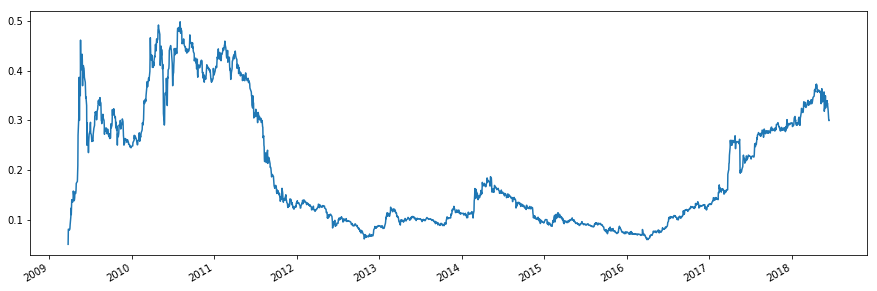

In [13]:
ts_data.plot(figsize=(15, 5))

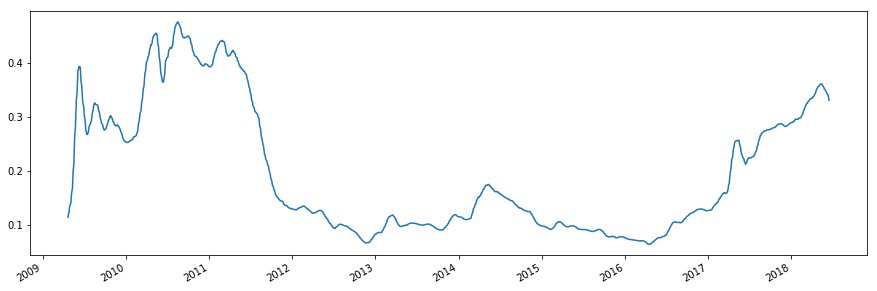

In [14]:
ts_data_ma = ts_data.rolling(20).mean()
ts_data_ma.plot(figsize=(15, 5))

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

## Read news data

In [19]:
import pandas as pd
import os

In [21]:
titleFiles = [x for x in os.listdir("../scrapped-data-1560265947865/titles/") if x.endswith(".txt")]
textFiles = [x for x in os.listdir("../scrapped-data-1560265947865/texts/") if x.endswith(".txt")]

titles, texts = [], []
for title_file in titleFiles:
    with open("../scrapped-data-1560265947865/titles/" + title_file, encoding="utf-8") as f:
        titles.append(f.read())
for text_file in textFiles:
    with open("../scrapped-data-1560265947865/texts/" + text_file, encoding="utf-8") as f:
        texts.append(f.read())

news_title_data = pd.DataFrame({"date": titleFiles, "title": titles}) 
news_texts_data = pd.DataFrame({"date": textFiles, "text": texts}) 

In [22]:
news_title_data.head()

,date,title
0,2009-08-10T17:30:01+03:00.txt,Инвесторы прогнозируют дальнейший рост украинс...
1,2016-09-29T17:40:00+03:00.txt,Стратегия на рынках капитала в ЦВЕ и других ре...
2,2017-08-19T20:00:00+03:00.txt,Главное за неделю: изменения в валютное законо...
3,2014-06-05T09:19:46+03:00.txt,Всеукраинская акция Райффайзен Банка Аваль «Ве...
4,2016-06-03T20:48:00+03:00.txt,Райффайзен Банк Аваль — снова среди самых наде...


In [23]:
news_texts_data.head()

,date,text
0,2009-08-10T17:30:01+03:00.txt,\nХотелось бы отметить один важный и необычный...
1,2016-09-29T17:40:00+03:00.txt,\nНовая норма. Сохранение низких процентных ст...
2,2017-08-19T20:00:00+03:00.txt,\nПрогноз на выходные. Куда катится наличный д...
3,2014-06-05T09:19:46+03:00.txt,\nОдесская областная дирекция Райффайзен Банка...
4,2016-06-03T20:48:00+03:00.txt,\nРайффайзен Банк Аваль снова занял ведущие по...


In [24]:
news_data = pd.merge(news_title_data, news_texts_data)

In [25]:
news_data.head()

,date,title,text
0,2009-08-10T17:30:01+03:00.txt,Инвесторы прогнозируют дальнейший рост украинс...,\nХотелось бы отметить один важный и необычный...
1,2016-09-29T17:40:00+03:00.txt,Стратегия на рынках капитала в ЦВЕ и других ре...,\nНовая норма. Сохранение низких процентных ст...
2,2017-08-19T20:00:00+03:00.txt,Главное за неделю: изменения в валютное законо...,\nПрогноз на выходные. Куда катится наличный д...
3,2014-06-05T09:19:46+03:00.txt,Всеукраинская акция Райффайзен Банка Аваль «Ве...,\nОдесская областная дирекция Райффайзен Банка...
4,2016-06-03T20:48:00+03:00.txt,Райффайзен Банк Аваль — снова среди самых наде...,\nРайффайзен Банк Аваль снова занял ведущие по...


In [26]:
date_ex = "2009-08-10T17:30:01+03:00.txt"
time_parsed = date_ex[:-10].split("T")[1]
date_parsed = date_ex[:-10].split("T")[0]
print(time_parsed, date_parsed)

17:30:01 2009-08-10


In [27]:
news_data.describe()

,date,title,text
count,1572,1572,1572
unique,1572,1554,1571
top,2018-03-14T17:10:00+02:00.txt,Новый рейтинг устойчивости банков от портала «...,"\nак сообщалось ранее, с марта 2016 года в Рай..."
freq,1,4,2


In [28]:
news_data["time"] = [date[:-10].split("T")[1] for date in news_data.date]
news_data["date"] = [date[:-10].split("T")[0] for date in news_data.date]

In [29]:
news_data.head()

,date,title,text,time
0,2009-08-10,Инвесторы прогнозируют дальнейший рост украинс...,\nХотелось бы отметить один важный и необычный...,17:30:01
1,2016-09-29,Стратегия на рынках капитала в ЦВЕ и других ре...,\nНовая норма. Сохранение низких процентных ст...,17:40:00
2,2017-08-19,Главное за неделю: изменения в валютное законо...,\nПрогноз на выходные. Куда катится наличный д...,20:00:00
3,2014-06-05,Всеукраинская акция Райффайзен Банка Аваль «Ве...,\nОдесская областная дирекция Райффайзен Банка...,09:19:46
4,2016-06-03,Райффайзен Банк Аваль — снова среди самых наде...,\nРайффайзен Банк Аваль снова занял ведущие по...,20:48:00


In [30]:
news_data.head(20)

,date,title,text,time
0,2009-08-10,Инвесторы прогнозируют дальнейший рост украинс...,\nХотелось бы отметить один важный и необычный...,17:30:01
1,2016-09-29,Стратегия на рынках капитала в ЦВЕ и других ре...,\nНовая норма. Сохранение низких процентных ст...,17:40:00
2,2017-08-19,Главное за неделю: изменения в валютное законо...,\nПрогноз на выходные. Куда катится наличный д...,20:00:00
3,2014-06-05,Всеукраинская акция Райффайзен Банка Аваль «Ве...,\nОдесская областная дирекция Райффайзен Банка...,09:19:46
4,2016-06-03,Райффайзен Банк Аваль — снова среди самых наде...,\nРайффайзен Банк Аваль снова занял ведущие по...,20:48:00
5,2013-09-05,Индекс «Украинской биржи» UX завершил день неб...,\nИндекс «Украинской биржи» UX завершил день с...,19:03:49
6,2010-10-19,Суд закрыл дело о банкротстве «Хлеба Украины»,"\nСегодня, 19 октября, стало известно, что Хоз...",12:17:27
7,2017-06-02,Райффайзен Банк Интернациональ запускает финте...,"\n1 июня 2017 года Йоганн Штробль, председател...",14:59:00
8,2014-12-03,Что помогло одному из крупнейших банков страны...,\nПосле продажи УкрСиббанка финансовой группе ...,12:02:00
9,2013-12-03,12 декабря в Киеве начинает работу XI Ежегодна...,\nЦелью Конференции является обсуждение актуал...,11:47:53


In [31]:
import sys
!{sys.executable} -m pip install tokenize_uk

You are using pip version 18.1, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [32]:
from langdetect import detect

news_data["lang"] = [detect(text) for text in news_data.text]

In [33]:
news_data.head(30)

,date,title,text,time,lang
0,2009-08-10,Инвесторы прогнозируют дальнейший рост украинс...,\nХотелось бы отметить один важный и необычный...,17:30:01,ru
1,2016-09-29,Стратегия на рынках капитала в ЦВЕ и других ре...,\nНовая норма. Сохранение низких процентных ст...,17:40:00,ru
2,2017-08-19,Главное за неделю: изменения в валютное законо...,\nПрогноз на выходные. Куда катится наличный д...,20:00:00,ru
3,2014-06-05,Всеукраинская акция Райффайзен Банка Аваль «Ве...,\nОдесская областная дирекция Райффайзен Банка...,09:19:46,ru
4,2016-06-03,Райффайзен Банк Аваль — снова среди самых наде...,\nРайффайзен Банк Аваль снова занял ведущие по...,20:48:00,ru
5,2013-09-05,Индекс «Украинской биржи» UX завершил день неб...,\nИндекс «Украинской биржи» UX завершил день с...,19:03:49,ru
6,2010-10-19,Суд закрыл дело о банкротстве «Хлеба Украины»,"\nСегодня, 19 октября, стало известно, что Хоз...",12:17:27,ru
7,2017-06-02,Райффайзен Банк Интернациональ запускает финте...,"\n1 июня 2017 года Йоганн Штробль, председател...",14:59:00,ru
8,2014-12-03,Что помогло одному из крупнейших банков страны...,\nПосле продажи УкрСиббанка финансовой группе ...,12:02:00,ru
9,2013-12-03,12 декабря в Киеве начинает работу XI Ежегодна...,\nЦелью Конференции является обсуждение актуал...,11:47:53,ru


In [34]:
news_data.to_csv("news_data.csv", encoding='utf-8')

In [35]:
import pandas as pd
from tokenize_uk import tokenize_uk
import io
import numpy as np
import pickle
import torch
from torch.utils.data import Dataset, DataLoader
import random
random.seed(0)
torch.manual_seed(0)

In [36]:
#!/usr/bin/python
#
# This example shows how to use the MITIE Python API to perform named entity
# recognition and also how to run a binary relation detector on top of the
# named entity recognition outputs.
#
import sys, os
# Make sure you put the mitielib folder into the python search path.  There are
# a lot of ways to do this, here we do it programmatically with the following
# two statements:


from mitie import *
from collections import defaultdict


print("loading NER model...")
ner_uk = named_entity_extractor('Models/uk_model.dat')
print("\nTags output by this NER model:", ner_uk.get_possible_ner_tags())


loading NER model...

Tags output by this NER model: ['LOC', 'ORG', 'PERS', 'MISC']


In [37]:
# Load a text file and convert it into a list of words.
tokens = tokenize(news_data.text[0].encode('utf-8'))
tokens = list(map(lambda x : x.decode('utf-8'), tokens))
print("Tokenized input:", tokens)

entities = ner_uk.extract_entities(tokens)
print("\nEntities found:", entities)
print("\nNumber of entities detected:", len(entities))

Tokenized input: ['Хотелось', 'бы', 'отметить', 'один', 'важный', 'и', 'необычный', 'момент', 'на', 'украинских', 'фондовых', 'площадках', '.', 'Рост', 'количества', 'совершенных', 'сделок', 'и', 'объема', 'торгов', 'растет', 'третью', 'неделю', 'подряд', '(', 'это', 'особенно', 'ярко', 'видно', 'на', '«Украинской', 'бирже»', ')', '.', 'Это', 'говорит', 'о', 'том', ',', 'что', 'подъем', 'основан', 'на', 'относительно', 'прочном', 'фундаменте', ',', 'при', 'этом', 'можно', 'заметить', ',', 'что', 'во', 'время', 'коррекции', 'рынков', 'активность', 'немного', 'снижается', '.', 'Это', 'в', 'свою', 'очередь', ',', 'свидетельствует', 'о', 'том', ',', 'что', 'в', 'большинстве', 'своем', 'инвесторы', 'прогнозируют', 'дальнейший', 'рост', 'котировок', 'акций', 'отечественных', 'предприятий', '.', 'Удачная', 'неделя', 'для', 'рынка', 'акций', 'Прошедшая', 'неделя', 'для', 'украинского', 'рынка', 'акций', 'оказалась', 'весьма', 'удачной', 'для', 'обладателей', 'длинных', 'позиций', '.', 'Индекс'

In [38]:
entities_news_data = news_data.copy()
entities_news_data['LOC'] = 0
entities_news_data['ORG'] = 0
entities_news_data['PERS'] = 0
entities_news_data.head()

,date,title,text,time,lang,LOC,ORG,PERS
0,2009-08-10,Инвесторы прогнозируют дальнейший рост украинс...,\nХотелось бы отметить один важный и необычный...,17:30:01,ru,0,0,0
1,2016-09-29,Стратегия на рынках капитала в ЦВЕ и других ре...,\nНовая норма. Сохранение низких процентных ст...,17:40:00,ru,0,0,0
2,2017-08-19,Главное за неделю: изменения в валютное законо...,\nПрогноз на выходные. Куда катится наличный д...,20:00:00,ru,0,0,0
3,2014-06-05,Всеукраинская акция Райффайзен Банка Аваль «Ве...,\nОдесская областная дирекция Райффайзен Банка...,09:19:46,ru,0,0,0
4,2016-06-03,Райффайзен Банк Аваль — снова среди самых наде...,\nРайффайзен Банк Аваль снова занял ведущие по...,20:48:00,ru,0,0,0


In [39]:
for index, row in entities_news_data.iterrows():
    LOC = 0
    ORG = 0
    PERS = 0
    
    tokens = tokenize(row.text.encode('utf-8'))
    tokens = list(map(lambda x : x.decode('utf-8'), tokens))
    
    entities = ner_uk.extract_entities(tokens)
    
    for item in entities:
        if item[1] == 'LOC':
            LOC += 1
        elif item[1] == 'PERS':
            PERS += 1
        elif item[1] == 'ORG':
            ORG += 1

    entities_news_data.LOC[index] = LOC
    entities_news_data.ORG[index] = ORG
    entities_news_data.PERS[index] = PERS

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [40]:
entities_news_data.head()

,date,title,text,time,lang,LOC,ORG,PERS
0,2009-08-10,Инвесторы прогнозируют дальнейший рост украинс...,\nХотелось бы отметить один важный и необычный...,17:30:01,ru,11,3,7
1,2016-09-29,Стратегия на рынках капитала в ЦВЕ и других ре...,\nНовая норма. Сохранение низких процентных ст...,17:40:00,ru,15,2,19
2,2017-08-19,Главное за неделю: изменения в валютное законо...,\nПрогноз на выходные. Куда катится наличный д...,20:00:00,ru,8,8,29
3,2014-06-05,Всеукраинская акция Райффайзен Банка Аваль «Ве...,\nОдесская областная дирекция Райффайзен Банка...,09:19:46,ru,0,1,1
4,2016-06-03,Райффайзен Банк Аваль — снова среди самых наде...,\nРайффайзен Банк Аваль снова занял ведущие по...,20:48:00,ru,1,4,0


In [41]:
entities_news_data.to_csv("entities_news_data.csv", encoding='utf-8')

In [42]:
ts_data.head()

2009-03-25    0.0500
2009-03-26    0.0804
2009-03-27    0.0805
2009-03-30    0.0785
2009-04-01    0.0800
dtype: float64

In [43]:
price_data = pd.read_csv("timeseries_data.csv")
# all_data = pd.merge(price_data, news_data)

In [45]:
import csv

tone_dict_uk = {}

with open('tone-dict-uk.tsv') as tsvfile:
  reader = csv.reader(tsvfile, delimiter='\t')
  for row in reader:
  
        tone_dict_uk[row[0]] = int(row[1])
    
tone_dict_ru = {}

with open('tone-dict-ru.csv') as csvfile:
  reader = csv.reader(csvfile)
  for row in reader:
        try:  
            tone_dict_ru[row[0]] = int(row[1])
        except: 
            pass
    

In [46]:
tone_dict_uk['мрія']


1

In [47]:
tone_dict_ru['ужас']

-5

In [50]:
data = pd.read_csv("timeseries_data_df.csv")

In [51]:
news_data.loc[news_data.date == '2009-03-25']['text'].values[0][:15]

'\nПока даже заоб'

In [52]:
data['article'] = [news_data.loc[news_data.date == curr_date].text for curr_date in data.date]

In [53]:
data.head()

,date,price,article
0,2009-03-25,0.0500,304 \nПока даже заоблачные процентные ставк...
1,2009-03-26,0.0804,530 \nФонд гарантирования вкладов определи...
2,2009-03-27,0.0805,1514 \nФонд гарантирования вкладов определи...
3,2009-03-30,0.0785,"Series([], Name: text, dtype: object)"
4,2009-04-01,0.0800,324 \nНациональный банк Украины предоставил...


In [54]:
data.article = [article.values[0].lower() if article.values.any() else '' for article in data.article]
data.article = [' '.join(list(map(lambda x : x.decode('utf-8'), tokenize(article.encode('utf-8'))))) if article else '' for article in data.article]
data.head()




,date,price,article
0,2009-03-25,0.0500,пока даже заоблачные процентные ставки и лояль...
1,2009-03-26,0.0804,фонд гарантирования вкладов определил восемь б...
2,2009-03-27,0.0805,фонд гарантирования вкладов определил 8 банков...
3,2009-03-30,0.0785,
4,2009-04-01,0.0800,национальный банк украины предоставил 1 млрд г...


In [55]:
def get_sentiment_score(text, lang):
    text_sentiment_sum = 0
    for word in text.split(' '):

        if lang == 'uk':
            try:
                text_sentiment_sum += int(tone_dict_uk[word])
            except:
                pass
        if lang == 'ru':
            try:
                text_sentiment_sum += int(tone_dict_ru[word])
            except:
                pass
                
    return text_sentiment_sum / len(text.split(' '))

In [56]:
data['lang'] = [news_data.loc[news_data.date == curr_date].lang for curr_date in data.date]
data.lang = [lang.values[0] if lang.values.any() else '-' for lang in data.lang]
data.head()

,date,price,article,lang
0,2009-03-25,0.0500,пока даже заоблачные процентные ставки и лояль...,ru
1,2009-03-26,0.0804,фонд гарантирования вкладов определил восемь б...,ru
2,2009-03-27,0.0805,фонд гарантирования вкладов определил 8 банков...,ru
3,2009-03-30,0.0785,,-
4,2009-04-01,0.0800,национальный банк украины предоставил 1 млрд г...,ru


In [57]:
data['sentiment_score'] = [get_sentiment_score(row[1].article, row[1].lang) for row in data.iterrows()]

In [60]:
data.head()

,date,price,article,lang,sentiment_score
0,2009-03-25,0.0500,пока даже заоблачные процентные ставки и лояль...,ru,-0.002665
1,2009-03-26,0.0804,фонд гарантирования вкладов определил восемь б...,ru,0.000000
2,2009-03-27,0.0805,фонд гарантирования вкладов определил 8 банков...,ru,0.000000
3,2009-03-30,0.0785,,-,0.000000
4,2009-04-01,0.0800,национальный банк украины предоставил 1 млрд г...,ru,0.000000


In [62]:
entities_news_data = pd.read_csv('entities_news_data.csv')
entities_news_data.head()

,Unnamed: 0,date,title,text,time,lang,LOC,ORG,PERS
0,0,2009-08-10,Инвесторы прогнозируют дальнейший рост украинс...,\nХотелось бы отметить один важный и необычный...,17:30:01,ru,11,3,7
1,1,2016-09-29,Стратегия на рынках капитала в ЦВЕ и других ре...,\nНовая норма. Сохранение низких процентных ст...,17:40:00,ru,15,2,19
2,2,2017-08-19,Главное за неделю: изменения в валютное законо...,\nПрогноз на выходные. Куда катится наличный д...,20:00:00,ru,8,8,29
3,3,2014-06-05,Всеукраинская акция Райффайзен Банка Аваль «Ве...,\nОдесская областная дирекция Райффайзен Банка...,09:19:46,ru,0,1,1
4,4,2016-06-03,Райффайзен Банк Аваль — снова среди самых наде...,\nРайффайзен Банк Аваль снова занял ведущие по...,20:48:00,ru,1,4,0


In [63]:
data['LOC'] = [entities_news_data.loc[entities_news_data.date == curr_date].LOC for curr_date in data.date]
data['LOC'] = [loc.values[0] if loc.values.any() else 0 for loc in data['LOC']]

data['ORG'] = [entities_news_data.loc[entities_news_data.date == curr_date].ORG for curr_date in data.date]
data['ORG'] = [org.values[0] if org.values.any() else 0 for org in data['ORG']]

data['PERS'] = [entities_news_data.loc[entities_news_data.date == curr_date].PERS for curr_date in data.date]
data['PERS'] = [pers.values[0] if  pers.values.any() else 0 for pers in data['PERS']]

In [64]:
data.head(20)

,date,price,article,lang,sentiment_score,LOC,ORG,PERS
0,2009-03-25,0.0500,пока даже заоблачные процентные ставки и лояль...,ru,-0.002665,6,4,38
1,2009-03-26,0.0804,фонд гарантирования вкладов определил восемь б...,ru,0.000000,2,0,0
2,2009-03-27,0.0805,фонд гарантирования вкладов определил 8 банков...,ru,0.000000,2,0,0
3,2009-03-30,0.0785,,-,0.000000,0,0,0
4,2009-04-01,0.0800,национальный банк украины предоставил 1 млрд г...,ru,0.000000,2,0,5
5,2009-04-02,0.0825,"если временной администрации , назначенной нбу...",ru,0.000000,4,1,3
6,2009-04-03,0.0900,международное рейтинговое агентство moody 's i...,ru,0.000000,3,1,3
7,2009-04-06,0.1055,,-,0.000000,0,0,0
8,2009-04-07,0.1230,,-,0.000000,0,0,0
9,2009-04-08,0.1100,,-,0.000000,0,0,0


In [65]:
data.to_csv("ready_data.csv", encoding='utf-8')

In [66]:
full_data = data.copy()

In [67]:
full_data['day_before_LOC'] = [full_data['LOC'][i-1] if i > 0 else 0 for i, loc in enumerate(full_data['LOC'])]
full_data['2_day_before_LOC'] = [full_data['LOC'][i-2] if i > 1 else 0 for i, loc in enumerate(full_data['LOC'])]
full_data['3_day_before_LOC'] = [full_data['LOC'][i-3] if i > 2 else 0 for i, loc in enumerate(full_data['LOC'])]

In [68]:
full_data['day_before_ORG'] = [full_data['ORG'][i-1] if i > 0 else 0 for i, loc in enumerate(full_data['ORG'])]
full_data['2_day_before_ORG'] = [full_data['ORG'][i-2] if i > 1 else 0 for i, loc in enumerate(full_data['ORG'])]
full_data['3_day_before_ORG'] = [full_data['ORG'][i-3] if i > 2 else 0 for i, loc in enumerate(full_data['ORG'])]

In [69]:
full_data['day_before_PERS'] = [full_data['PERS'][i-1] if i > 0 else 0 for i, loc in enumerate(full_data['PERS'])]
full_data['2_day_before_PERS'] = [full_data['PERS'][i-2] if i > 1 else 0 for i, loc in enumerate(full_data['PERS'])]
full_data['3_day_before_PERS'] = [full_data['PERS'][i-3] if i > 2 else 0 for i, loc in enumerate(full_data['PERS'])]

In [70]:
full_data.head(20)

,date,price,article,lang,sentiment_score,LOC,ORG,PERS,day_before_LOC,2_day_before_LOC,3_day_before_LOC,day_before_ORG,2_day_before_ORG,3_day_before_ORG,day_before_PERS,2_day_before_PERS,3_day_before_PERS
0,2009-03-25,0.0500,пока даже заоблачные процентные ставки и лояль...,ru,-0.002665,6,4,38,0,0,0,0,0,0,0,0,0
1,2009-03-26,0.0804,фонд гарантирования вкладов определил восемь б...,ru,0.000000,2,0,0,6,0,0,4,0,0,38,0,0
2,2009-03-27,0.0805,фонд гарантирования вкладов определил 8 банков...,ru,0.000000,2,0,0,2,6,0,0,4,0,0,38,0
3,2009-03-30,0.0785,,-,0.000000,0,0,0,2,2,6,0,0,4,0,0,38
4,2009-04-01,0.0800,национальный банк украины предоставил 1 млрд г...,ru,0.000000,2,0,5,0,2,2,0,0,0,0,0,0
5,2009-04-02,0.0825,"если временной администрации , назначенной нбу...",ru,0.000000,4,1,3,2,0,2,0,0,0,5,0,0
6,2009-04-03,0.0900,международное рейтинговое агентство moody 's i...,ru,0.000000,3,1,3,4,2,0,1,0,0,3,5,0
7,2009-04-06,0.1055,,-,0.000000,0,0,0,3,4,2,1,1,0,3,3,5
8,2009-04-07,0.1230,,-,0.000000,0,0,0,0,3,4,0,1,1,0,3,3
9,2009-04-08,0.1100,,-,0.000000,0,0,0,0,0,3,0,0,1,0,0,3


In [71]:
full_data.to_csv("ready_full_data.csv", encoding='utf-8')

In [72]:
import sys
!{sys.executable} -m pip install sklearn

  Running setup.py bdist_wheel for sklearn ... done
  Stored in directory: /Users/madtaras/Library/Caches/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn
You are using pip version 18.1, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [73]:
from sklearn.model_selection import train_test_split
from sklearn import svm

In [74]:
full_data = pd.read_csv('ready_full_data.csv')
full_data.head()

,Unnamed: 0,date,price,article,lang,sentiment_score,LOC,ORG,PERS,day_before_LOC,2_day_before_LOC,3_day_before_LOC,day_before_ORG,2_day_before_ORG,3_day_before_ORG,day_before_PERS,2_day_before_PERS,3_day_before_PERS
0,0,2009-03-25,0.0500,пока даже заоблачные процентные ставки и лояль...,ru,-0.002665,6,4,38,0,0,0,0,0,0,0,0,0
1,1,2009-03-26,0.0804,фонд гарантирования вкладов определил восемь б...,ru,0.000000,2,0,0,6,0,0,4,0,0,38,0,0
2,2,2009-03-27,0.0805,фонд гарантирования вкладов определил 8 банков...,ru,0.000000,2,0,0,2,6,0,0,4,0,0,38,0
3,3,2009-03-30,0.0785,NaN,-,0.000000,0,0,0,2,2,6,0,0,4,0,0,38
4,4,2009-04-01,0.0800,национальный банк украины предоставил 1 млрд г...,ru,0.000000,2,0,5,0,2,2,0,0,0,0,0,0


In [75]:
X = full_data.copy()
X = X.drop(['date', 'price', 'article', 'lang'], axis=1)
y = full_data[['price']]
y = np.ravel(y)

print(X.head())
print(y)
train_X, text_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

   Unnamed: 0  sentiment_score  LOC  ORG  PERS  day_before_LOC  \
0           0        -0.002665    6    4    38               0   
1           1         0.000000    2    0     0               6   
2           2         0.000000    2    0     0               2   
3           3         0.000000    0    0     0               2   
4           4         0.000000    2    0     5               0   

   2_day_before_LOC  3_day_before_LOC  day_before_ORG  2_day_before_ORG  \
0                 0                 0               0                 0   
1                 0                 0               4                 0   
2                 6                 0               0                 4   
3                 2                 6               0                 0   
4                 2                 2               0                 0   

   3_day_before_ORG  day_before_PERS  2_day_before_PERS  3_day_before_PERS  
0                 0                0                  0                  0 

In [80]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_validate
import math

best_params = {
    "C": 100,
    "epsilon": 5,
}
best_svr = SVR(kernel='linear', C=best_params["C"], epsilon=best_params["epsilon"], coef0=0.1, shrinking=True,
               tol=0.001, cache_size=200, verbose=True, max_iter=10000)

scoring = {
           'abs_error': 'neg_mean_absolute_error',
           'squared_error': 'neg_mean_squared_error'}

scores = cross_validate(best_svr, X, y, cv=10, scoring=scoring, return_train_score=True)
print("MAE :", abs(scores['test_abs_error'].mean()), "| RMSE :", math.sqrt(abs(scores['test_squared_error'].mean())))

best_svr.fit(train_X, train_y)
pred=best_svr.predict(text_X)
print(best_svr.score(text_X, test_y))
from sklearn.metrics import r2_score
print(r2_score(test_y, pred))

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]MAE : 0.1313841990565669 | RMSE : 0.14574616505052398
[LibSVM]-0.32723115762059196
-0.32723115762059196


Model does not perform well :) :(

## ARMA, ARIMA

In [103]:
from statsmodels.tsa.arima_model import ARIMA

In [104]:
ts_data.head()

2009-03-25    0.0500
2009-03-26    0.0804
2009-03-27    0.0805
2009-03-30    0.0785
2009-04-01    0.0800
dtype: float64

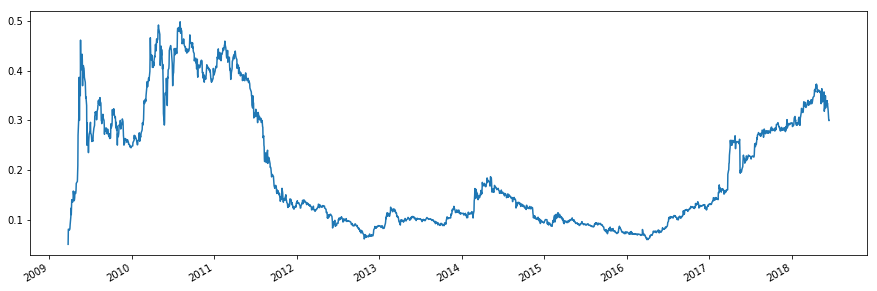

In [105]:
ts_data.plot(figsize=(15, 5))

/anaconda3/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2264
Model:                 ARIMA(1, 1, 2)   Log Likelihood                7712.372
Method:                       css-mle   S.D. of innovations              0.008
Date:                Thu, 08 Aug 2019   AIC                         -15414.744
Time:                        20:39:29   BIC                         -15386.120
Sample:                             1   HQIC                        -15404.300
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.710      0.478      -0.000       0.000
ar.L1.D.y     -0.9550      0.022    -43.660      0.000      -0.998      -0.912
ma.L1.D.y      0.8552      0.031     27.929      0.0

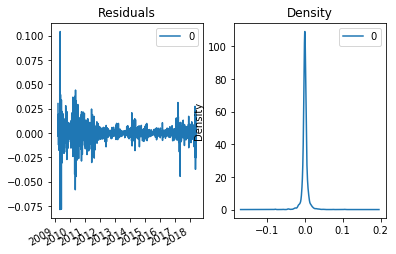

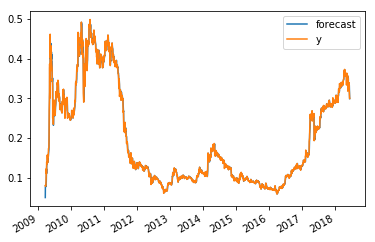

Text(0.5,1,'RMSE: 11.0071')

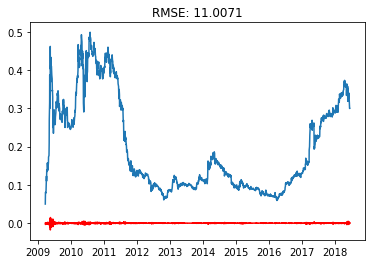

In [106]:
model = ARIMA(ts_data, order=(1,1,2))
model_fit = model.fit(disp=0)

print(model_fit.summary())

residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

model_fit.plot_predict(dynamic=False)
plt.show()

model_fit = model.fit(disp=0)
plt.plot(ts_data)
plt.plot(model_fit.fittedvalues, color='red')
RMSE_ARIMA_1 = (model_fit.fittedvalues.dropna()-ts_data)**2
RMSE_ARIMA_1 = RMSE_ARIMA_1.dropna()
plt.title('RMSE: %.4f'% np.sqrt(sum(RMSE_ARIMA_1)))

/anaconda3/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2264
Model:                 ARIMA(3, 1, 2)   Log Likelihood                7719.892
Method:                       css-mle   S.D. of innovations              0.008
Date:                Thu, 08 Aug 2019   AIC                         -15425.784
Time:                        20:39:45   BIC                         -15385.710
Sample:                             1   HQIC                        -15411.162
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.566      0.571      -0.000       0.001
ar.L1.D.y     -0.2311      0.067     -3.452      0.001      -0.362      -0.100
ar.L2.D.y      0.8140      0.054     15.022      0.0

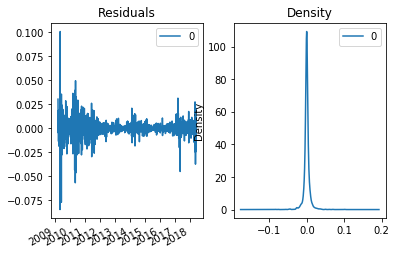

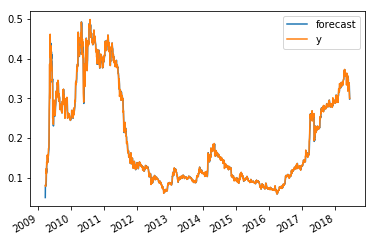

Text(0.5,1,'RMSE: 11.0052')

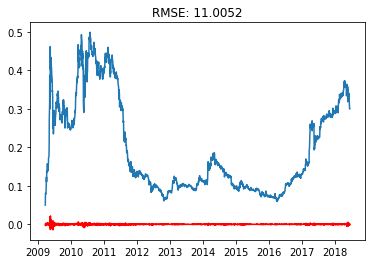

In [107]:
model = ARIMA(ts_data, order=(3,1,2))
model_fit = model.fit(disp=0)

print(model_fit.summary())

residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

model_fit.plot_predict(dynamic=False)
plt.show()

model_fit = model.fit(disp=0)
plt.plot(ts_data)
plt.plot(model_fit.fittedvalues, color='red')
RMSE_ARIMA_1 = (model_fit.fittedvalues.dropna()-ts_data)**2
RMSE_ARIMA_1 = RMSE_ARIMA_1.dropna()
plt.title('RMSE: %.4f'% np.sqrt(sum(RMSE_ARIMA_1)))

/anaconda3/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2264
Model:                 ARIMA(5, 1, 2)   Log Likelihood                7744.819
Method:                       css-mle   S.D. of innovations              0.008
Date:                Thu, 08 Aug 2019   AIC                         -15471.638
Time:                        20:40:02   BIC                         -15420.114
Sample:                             1   HQIC                        -15452.838
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.591      0.555      -0.000       0.000
ar.L1.D.y      0.4614      0.135      3.410      0.001       0.196       0.727
ar.L2.D.y     -0.4806      0.075     -6.398      0.0

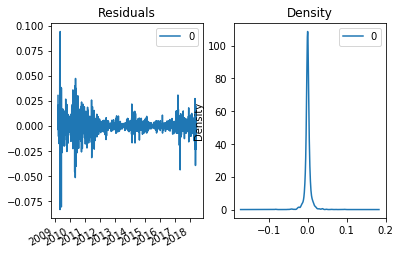

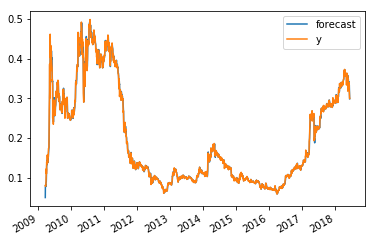

Text(0.5,1,'RMSE: 11.0059')

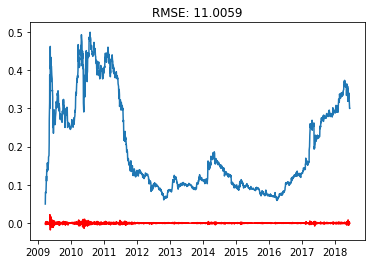

In [108]:
model = ARIMA(ts_data, order=(5,1,2))
model_fit = model.fit(disp=0)

print(model_fit.summary())

residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

model_fit.plot_predict(dynamic=False)
plt.show()

model_fit = model.fit(disp=0)
plt.plot(ts_data)
plt.plot(model_fit.fittedvalues, color='red')
RMSE_ARIMA_1 = (model_fit.fittedvalues.dropna()-ts_data)**2
RMSE_ARIMA_1 = RMSE_ARIMA_1.dropna()
plt.title('RMSE: %.4f'% np.sqrt(sum(RMSE_ARIMA_1)))

/anaconda3/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 2265
Model:                     ARMA(1, 2)   Log Likelihood                7704.768
Method:                       css-mle   S.D. of innovations              0.008
Date:                Thu, 08 Aug 2019   AIC                         -15399.536
Time:                        20:40:16   BIC                         -15370.909
Sample:                             0   HQIC                        -15389.091
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1904      0.068      2.793      0.005       0.057       0.324
ar.L1.y        0.9981      0.001    834.842      0.000       0.996       1.000
ma.L1.y       -0.1077      0.021     -5.081      0.0

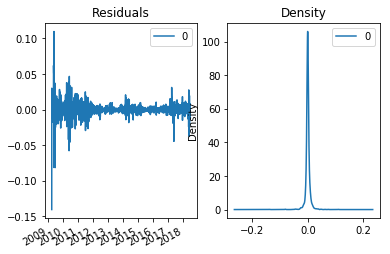

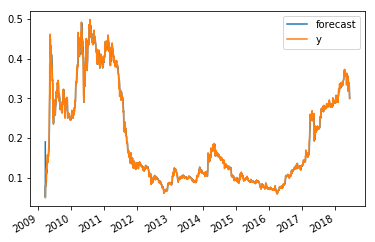

Text(0.5,1,'RMSE: 0.4080')

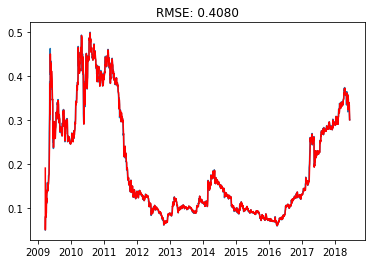

In [109]:
model = ARIMA(ts_data, order=(1,0,2))
model_fit = model.fit(disp=0)

print(model_fit.summary())

residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

model_fit.plot_predict(dynamic=False)
plt.show()

model_fit = model.fit(disp=0)
plt.plot(ts_data)
plt.plot(model_fit.fittedvalues, color='red')
RMSE_ARIMA_1 = (model_fit.fittedvalues.dropna()-ts_data)**2
RMSE_ARIMA_1 = RMSE_ARIMA_1.dropna()
plt.title('RMSE: %.4f'% np.sqrt(sum(RMSE_ARIMA_1)))

/anaconda3/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 2265
Model:                     ARMA(3, 2)   Log Likelihood                7713.440
Method:                       css-mle   S.D. of innovations              0.008
Date:                Thu, 08 Aug 2019   AIC                         -15412.879
Time:                        20:40:27   BIC                         -15372.802
Sample:                             0   HQIC                        -15398.256
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1899      0.058      3.278      0.001       0.076       0.303
ar.L1.y        1.4008      0.037     38.288      0.000       1.329       1.472
ar.L2.y        0.0169      0.111      0.152      0.8

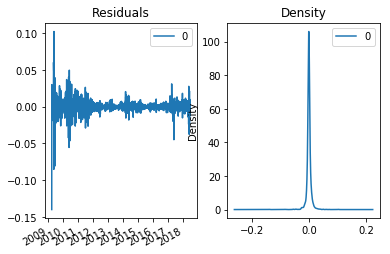

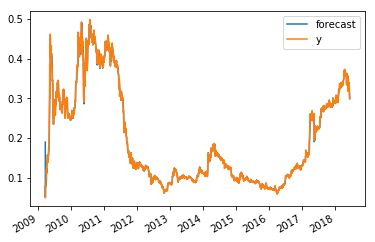

Text(0.5,1,'RMSE: 0.4065')

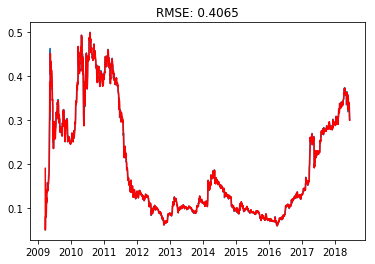

In [110]:
model = ARIMA(ts_data, order=(3,0,2))
model_fit = model.fit(disp=0)

print(model_fit.summary())

residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

model_fit.plot_predict(dynamic=False)
plt.show()

model_fit = model.fit(disp=0)
plt.plot(ts_data)
plt.plot(model_fit.fittedvalues, color='red')
RMSE_ARIMA_1 = (model_fit.fittedvalues.dropna()-ts_data)**2
RMSE_ARIMA_1 = RMSE_ARIMA_1.dropna()
plt.title('RMSE: %.4f'% np.sqrt(sum(RMSE_ARIMA_1)))

/anaconda3/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 2265
Model:                     ARMA(5, 2)   Log Likelihood                7744.698
Method:                       css-mle   S.D. of innovations              0.008
Date:                Thu, 08 Aug 2019   AIC                         -15471.396
Time:                        20:40:37   BIC                         -15419.868
Sample:                             0   HQIC                        -15452.595
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1906      0.063      3.013      0.003       0.067       0.315
ar.L1.y        1.6373      0.060     27.256      0.000       1.520       1.755
ar.L2.y       -1.1822      0.091    -12.981      0.0

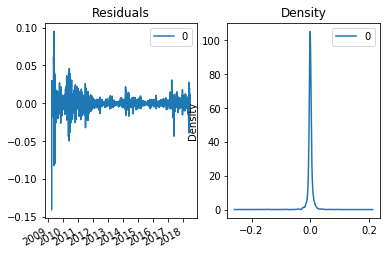

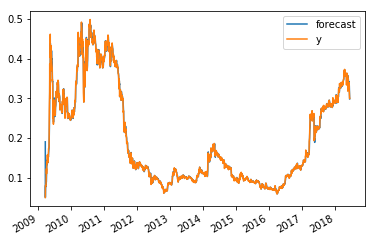

Text(0.5,1,'RMSE: 0.4019')

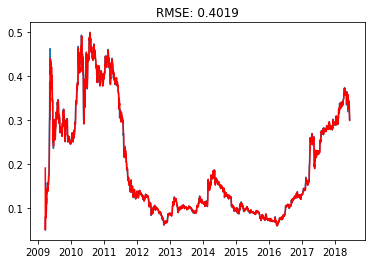

In [111]:
model = ARIMA(ts_data, order=(5,0,2))
model_fit = model.fit(disp=0)

print(model_fit.summary())

residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

model_fit.plot_predict(dynamic=False)
plt.show()

model_fit = model.fit(disp=0)
plt.plot(ts_data)
plt.plot(model_fit.fittedvalues, color='red')
RMSE_ARIMA_1 = (model_fit.fittedvalues.dropna()-ts_data)**2
RMSE_ARIMA_1 = RMSE_ARIMA_1.dropna()
plt.title('RMSE: %.4f'% np.sqrt(sum(RMSE_ARIMA_1)))

## Volatility based on price

In [3]:
stock_data = pd.read_csv('bavl_data.csv')

In [4]:
stock_data['<DATE>'] = [pd.to_datetime(date, format='%dd%mm%yy', errors='ignore') for date in stock_data['<DATE>']]

In [5]:
stock_data['<DATE>'] = pd.to_datetime(pd.Series(stock_data['<DATE>']), format="%d.%m.%Y")

In [6]:
stock_data.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,BAVL,D,2009-03-25,10:00:00,0.0500,0.0500,0.0500,0.0500,40000
1,BAVL,D,2009-03-26,10:00:00,0.0804,0.0816,0.0790,0.0810,3870000
2,BAVL,D,2009-03-27,10:00:00,0.0805,0.0805,0.0790,0.0790,1070000
3,BAVL,D,2009-03-30,10:00:00,0.0785,0.0785,0.0785,0.0785,650000
4,BAVL,D,2009-04-01,10:00:00,0.0800,0.0810,0.0800,0.0810,790000


In [7]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller

In [8]:
stock_data['Log_Ret'] = np.log(stock_data['<CLOSE>'] / stock_data['<CLOSE>'].shift(1))

In [9]:
stock_data.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,Log_Ret
0,BAVL,D,2009-03-25,10:00:00,0.0500,0.0500,0.0500,0.0500,40000,NaN
1,BAVL,D,2009-03-26,10:00:00,0.0804,0.0816,0.0790,0.0810,3870000,0.482426
2,BAVL,D,2009-03-27,10:00:00,0.0805,0.0805,0.0790,0.0790,1070000,-0.025001
3,BAVL,D,2009-03-30,10:00:00,0.0785,0.0785,0.0785,0.0785,650000,-0.006349
4,BAVL,D,2009-04-01,10:00:00,0.0800,0.0810,0.0800,0.0810,790000,0.031351


In [10]:
stock_data["Log_Ret"].rolling(20).apply(lambda x: pd.np.std(x))

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.


0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11           NaN
12           NaN
13           NaN
14           NaN
15           NaN
16           NaN
17           NaN
18           NaN
19           NaN
20      0.119821
21      0.069503
22      0.070651
23      0.070816
24      0.070803
25      0.071849
26      0.065844
27      0.075676
28      0.077320
29      0.079727
          ...   
2235    0.011240
2236    0.011343
2237    0.011853
2238    0.012119
2239    0.012134
2240    0.011910
2241    0.011555
2242    0.011715
2243    0.013149
2244    0.013047
2245    0.013226
2246    0.013194
2247    0.013744
2248    0.013718
2249    0.018530
2250    0.018628
2251    0.024004
2252    0.025479
2253    0.025402
2254    0.025360
2255    0.025396
2256    0.025229
2257    0.025123
2258    0.024952
2259    0.030106
2260    0.030114
2261    0.030111
2262    0.0339

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.


     <TICKER> <PER>     <DATE>    <TIME>  <OPEN>  <HIGH>   <LOW>  <CLOSE>  \
2250     BAVL     D 2018-05-25  10:00:00  0.3184  0.3280  0.3125   0.3224   
2251     BAVL     D 2018-05-29  10:00:00  0.3336  0.3440  0.3336   0.3438   
2252     BAVL     D 2018-05-30  10:00:00  0.3498  0.3499  0.3300   0.3300   
2253     BAVL     D 2018-05-31  10:00:00  0.3252  0.3399  0.3252   0.3369   
2254     BAVL     D 2018-06-01  10:00:00  0.3330  0.3394  0.3303   0.3365   
2255     BAVL     D 2018-06-04  10:00:00  0.3399  0.3399  0.3399   0.3399   
2256     BAVL     D 2018-06-05  10:00:00  0.3340  0.3398  0.3300   0.3378   
2257     BAVL     D 2018-06-06  10:00:00  0.3398  0.3398  0.3398   0.3398   
2258     BAVL     D 2018-06-07  10:00:00  0.3300  0.3365  0.3190   0.3364   
2259     BAVL     D 2018-06-08  10:00:00  0.3348  0.3348  0.2910   0.3104   
2260     BAVL     D 2018-06-11  10:00:00  0.3210  0.3210  0.3002   0.3093   
2261     BAVL     D 2018-06-12  10:00:00  0.3118  0.3118  0.3030   0.3117   

array([<matplotlib.axes._subplots.AxesSubplot object at 0x117674128>,
      dtype=object)

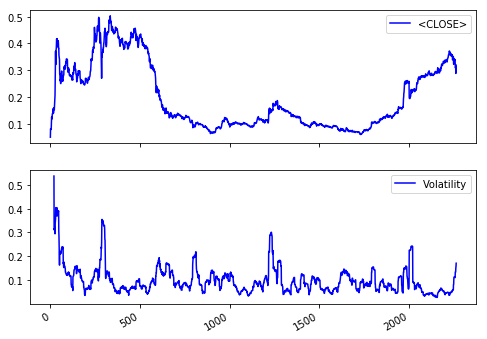

In [11]:
stock_data["Volatility"] = stock_data["Log_Ret"].rolling(20).apply(lambda x: pd.np.std(x)) * np.sqrt(20)

print(stock_data.tail(15))
# Plot the Price series and the Volatility
stock_data[['<CLOSE>', 'Volatility']].plot(subplots=True, color='blue',figsize=(8, 6))

In [12]:
stock_data.tail()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,Log_Ret,Volatility
2260,BAVL,D,2018-06-11,10:00:00,0.3210,0.3210,0.3002,0.3093,1160000,-0.003550,0.134672
2261,BAVL,D,2018-06-12,10:00:00,0.3118,0.3118,0.3030,0.3117,780000,0.007730,0.134658
2262,BAVL,D,2018-06-13,10:00:00,0.3065,0.3087,0.2880,0.2880,4000000,-0.079081,0.151965
2263,BAVL,D,2018-06-14,10:00:00,0.2998,0.3025,0.2870,0.2994,690000,0.038820,0.157979
2264,BAVL,D,2018-06-15,10:00:00,0.2999,0.3189,0.2999,0.3189,1210000,0.063097,0.171603


In [13]:
type(stock_data)

pandas.core.frame.DataFrame

In [14]:
import sys
!{sys.executable} -m pip install git+ssh://git@github.com/bashtage/arch.git@4.8.1

  Cloning ssh://git@github.com/bashtage/arch.git (to revision 4.8.1) to /private/var/folders/yf/sct2l0yd2hl5hg60zwqnjh_r0000gn/T/pip-req-build-1mdoalp_
  Running command git clone -q ssh://git@github.com/bashtage/arch.git /private/var/folders/yf/sct2l0yd2hl5hg60zwqnjh_r0000gn/T/pip-req-build-1mdoalp_
  Running command git checkout -q b19b7129a3f104b951440a4a66092b0f3ea1bc57
  Created wheel for arch: filename=arch-4.8.1-cp35-cp35m-macosx_10_6_x86_64.whl size=691407 sha256=5c51d92b8c8e83a60cc4e610da858cd8c75e132eb68feba13118870b6ad7f928
  Stored in directory: /private/var/folders/yf/sct2l0yd2hl5hg60zwqnjh_r0000gn/T/pip-ephem-wheel-cache-uui1al0j/wheels/9c/b8/70/d466f6f59a96a3550cfcca4ce05d1f9e2a79024c7b1cbf4420
Successfully built arch


In [16]:
!{sys.executable} -m pip install numpy==1.16.1

     |████████████████████████████████| 13.9MB 1.4MB/s eta 0:00:01
  Found existing installation: numpy 1.14.2
    Uninstalling numpy-1.14.2:
      Successfully uninstalled numpy-1.14.2


In [18]:
# I can't install arch so I'll use ARIMA for prediction \__O_o__/

In [19]:
from statsmodels.tsa.arima_model import ARIMA

In [37]:
stock_data_ts = stock_data.drop(columns=['<TICKER>', '<PER>', '<TIME>', '<LOW>', '<HIGH>', '<CLOSE>', '<VOL>', '<OPEN>', 'Log_Ret'])

In [38]:
stock_data_ts.head()

,<DATE>,Volatility
0,2009-03-25,NaN
1,2009-03-26,NaN
2,2009-03-27,NaN
3,2009-03-30,NaN
4,2009-04-01,NaN


In [39]:
stock_data_ts[21:].to_csv('stock_data_ts.csv', index=False)

In [40]:
stock_data_ts = pd.Series.from_csv('stock_data_ts.csv')

/anaconda3/lib/python3.5/site-packages/pandas/core/series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [45]:
stock_data_ts = stock_data_ts[1:]

In [48]:
stock_data_ts = stock_data_ts.convert_objects(convert_numeric=True)

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [49]:
stock_data_ts.head()

2009-04-27    0.310825
2009-04-28    0.315961
2009-04-29    0.316697
2009-04-30    0.316639
2009-05-05    0.321318
dtype: float64

/anaconda3/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 2244
Model:                     ARMA(1, 2)   Log Likelihood                7163.264
Method:                       css-mle   S.D. of innovations              0.010
Date:                Thu, 08 Aug 2019   AIC                         -14316.527
Time:                        22:59:40   BIC                         -14287.947
Sample:                             0   HQIC                        -14306.094
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1065      0.013      7.932      0.000       0.080       0.133
ar.L1.y        0.9817      0.004    224.112      0.000       0.973       0.990
ma.L1.y        0.1051      0.021      4.907      0.0

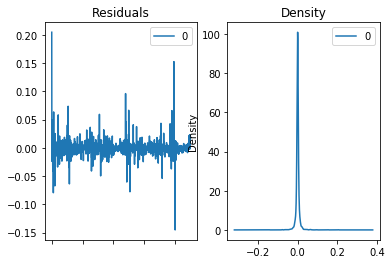

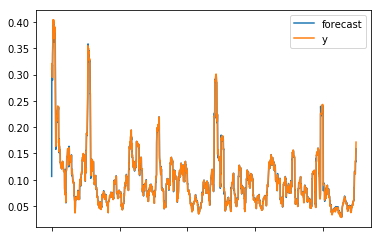

Text(0.5,1,'RMSE: 0.5119')

In [ ]:
model = ARIMA(stock_data_ts, order=(1,0,2))
model_fit = model.fit(disp=0)

print(model_fit.summary())

residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

model_fit.plot_predict(dynamic=False)
plt.show()

model_fit = model.fit(disp=0)
plt.plot(stock_data_ts)
plt.plot(model_fit.fittedvalues, color='red')
RMSE_ARIMA_1 = (model_fit.fittedvalues.dropna()-stock_data_ts)**2
RMSE_ARIMA_1 = RMSE_ARIMA_1.dropna()
plt.title('RMSE: %.4f'% np.sqrt(sum(RMSE_ARIMA_1)))